# Segmentación de Clientes 

Este notebook presenta el análisis y segmentación de clientes de una cadena de supermercados. Se utilizó la técnica de clustering "K-means", para agrupar a los clientes según su comportamiento de compra, con el fin de diseñar estrategias de marketing más efectivas.

# Librerías necesarias

Este notebook requiere las siguientes librerías para ejecutarse correctamente:

- pandas
- numpy
- matplotlib
- seaborn
- plotly
- scikit-learn


##  Carga de datos

Se carga la base principal `dataclientes.xlsx`, la cual contiene información sobre las transacciones realizadas por los clientes: productos, fechas, precios, métodos de pago, ubicación, promociones, etc.

In [14]:
#Carga de archivos
import pandas as pd
data=pd.read_excel("dataclientes.xlsx")

##  Inspección inicial

Se visualizan las primeras filas del dataset para conocer su estructura general.

In [3]:
display(data.head(10))

,Transaction_ID,Date,Customer_ID,Product,Payment_Method,City,Store_Type,Discount_Applied,Season,Promotion,Category_prod,Price
0,1000,2024-04-02,52,Laptop,Debit Card,San Diego,Supermarket,True,Spring,No,Electronics,1436
1,1001,2024-01-29,41,Trash Bags,Cash,Houston,Specialty Store,True,Winter,No,Household Supplies,10
2,1001,2024-01-29,41,Christmas Tree,Cash,Houston,Specialty Store,True,Winter,No,Seasonal Decor,42
3,1001,2024-01-29,41,Cheese,Cash,Houston,Specialty Store,True,Winter,No,Dairy,8
4,1002,2024-03-01,89,Wrapping Paper,Debit Card,San Diego,Supermarket,True,Winter,No,Stationery,2
5,1002,2024-03-01,89,Lawn Mower,Debit Card,San Diego,Supermarket,True,Winter,No,Gardening,131
6,1002,2024-03-01,89,Tomatoes,Debit Card,San Diego,Supermarket,True,Winter,No,Vegetables,2
7,1002,2024-03-01,89,Dish Soap,Debit Card,San Diego,Supermarket,True,Winter,No,Cleaning Supplies,5
8,1003,2023-04-27,3,Shrimp,Cash,San Diego,Specialty Store,True,Spring,BOGO (Buy One Get One),Seafood,16
9,1003,2023-04-27,3,Video Game Console,Cash,San Diego,Specialty Store,True,Spring,BOGO (Buy One Get One),Electronics,454


## Cálculo del ticket promedio por cliente

Se agrupa la información por `Customer_ID` para calcular tres variables importantes:

- `total_price`: el total gastado por cliente.
- `transaction_count`: cantidad total de transacciones realizadas.
- `ticket_promedio`: promedio de gasto por transacción (variable creada específicamente para el análisis de segmentación).

In [4]:
# Agrupar por Date y Customer_ID y calcular estadísticas agregadas
grouped_data = data.groupby('Customer_ID').agg(
    total_price=('Price', 'sum'),  # Suma total de precios por cliente
    transaction_count=('Transaction_ID', 'count'),  # Número total de transacciones por cliente
    ticket_promedio=('Price', 'mean')  # Ticket promedio por cliente
).reset_index()


# Mostrar los resultados
display(grouped_data.head(20))


,Customer_ID,total_price,transaction_count,ticket_promedio
0,1,27124,485,55.925773
1,2,20873,458,45.574236
2,3,18458,415,44.477108
3,4,17019,380,44.786842
4,5,21012,349,60.206304
5,6,32251,421,76.605701
6,7,24256,527,46.026565
7,8,10291,404,25.472772
8,9,19743,366,53.942623
9,10,21448,526,40.775665


## Revisar estructura de los datos

In [5]:
# Revisamos la estructura del dataset: cantidad de registros, tipos de datos y valores nulos
print(data.info())

# Comentario:
# El dataset tiene 43,577 registros y 12 columnas.
# No hay valores nulos en ninguna columna.
# Las variables categóricas están en formato object.
# La variable 'Date' está correctamente en formato datetime64.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43577 entries, 0 to 43576
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    43577 non-null  int64         
 1   Date              43577 non-null  datetime64[ns]
 2   Customer_ID       43577 non-null  int64         
 3   Product           43577 non-null  object        
 4   Payment_Method    43577 non-null  object        
 5   City              43577 non-null  object        
 6   Store_Type        43577 non-null  object        
 7   Discount_Applied  43577 non-null  bool          
 8   Season            43577 non-null  object        
 9   Promotion         43577 non-null  object        
 10  Category_prod     43577 non-null  object        
 11  Price             43577 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(7)
memory usage: 3.7+ MB
None


In [6]:
# Mostramos estadísticas descriptivas de las variables numéricas
data.describe().round(2)

# Comentario:
# El precio promedio por producto es de aproximadamente 46.24.
# Se observan valores extremos en 'Price' (máximo 2999).
# Hay 100 clientes diferentes (Customer_ID entre 1 y 100).
# Las transacciones van desde enero 2023 hasta abril 2024.

,Transaction_ID,Date,Customer_ID,Price
count,43577.00,43577,43577.00,43577.00
mean,8213.68,2023-08-31 20:30:27.716455936,50.67,46.24
min,1000.00,2023-01-01 00:00:00,1.00,1.00
25%,4600.00,2023-05-05 00:00:00,26.00,3.00
50%,8199.00,2023-09-01 00:00:00,51.00,5.00
75%,11829.00,2023-12-29 00:00:00,76.00,10.00
max,15458.00,2024-04-29 00:00:00,100.00,2999.00
std,4179.77,NaN,28.97,212.51


# Verificar valores nulos

In [7]:
data.isnull().sum()

Transaction_ID      0
Date                0
Customer_ID         0
Product             0
Payment_Method      0
City                0
Store_Type          0
Discount_Applied    0
Season              0
Promotion           0
Category_prod       0
Price               0
dtype: int64

# Contar duplicados explícitos

In [8]:
data.duplicated().sum()

0

# Asignar tipo 'category' a las variables categóricas

In [5]:
categorical_columns = ['Transaction_ID','Customer_ID','Payment_Method','Store_Type', 'Discount_Applied', 'Season', 'Promotion']
data[categorical_columns] = data[categorical_columns].astype('category')

# Comprobar los tipos de datos después de la conversión

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43577 entries, 0 to 43576
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_ID    43577 non-null  category      
 1   Date              43577 non-null  datetime64[ns]
 2   Customer_ID       43577 non-null  category      
 3   Product           43577 non-null  object        
 4   Payment_Method    43577 non-null  category      
 5   City              43577 non-null  object        
 6   Store_Type        43577 non-null  category      
 7   Discount_Applied  43577 non-null  category      
 8   Season            43577 non-null  category      
 9   Promotion         43577 non-null  category      
 10  Category_prod     43577 non-null  object        
 11  Price             43577 non-null  int64         
dtypes: category(7), datetime64[ns](1), int64(1), object(3)
memory usage: 2.6+ MB


In [11]:
#Nombre de las ciudades
data["City"].unique()

array(['San Diego', 'Houston', 'Chicago', 'New York', 'San Francisco',
       'Miami', 'Los Angeles', 'Philadelphia'], dtype=object)

# Análisis Exploratorio de Datos (EDA)

## Preparar los datos para análisis de productos por estación

Antes de generar los gráficos, es necesario realizar una transformación de los datos. En este paso, se agrupan los productos por estación del año (`Season`) y se limpian los elementos dentro de las celdas para contar correctamente la frecuencia de productos por estación.

Esto permitirá posteriormente construir gráficos de barras con los productos más vendidos en cada estación.


In [7]:
# Agrupar los productos por estación (Season)
newdfs = data[['Product', 'Season']].groupby('Season')

# Extraer las estaciones únicas
seasons = data.Season.unique()

# Función para limpiar el texto eliminando corchetes y comillas
def converter(input_element):
    return input_element.replace('[','').replace(']','').replace('"',"").replace("'","")

# Crear una lista para almacenar los productos convertidos por estación
dfs = []
for i in seasons:
    # Aplicar limpieza a los productos de cada estación y guardar resultado
    dfs.append((i, newdfs.get_group(i)['Product'].apply(converter)))

# Función para contar cuántas veces aparece cada producto en una estación
def productcount(season, df):
    k = {}
    for i in df:
        for j in i.split(','):
            j = j.strip()
            if j not in k:
                k[j] = 1
            else:
                k[j] += 1
    return season, k  # Devuelve la estación y el diccionario de productos contados

# Aplicar el conteo de productos por estación
answer = []
for i in range(len(dfs)):
    answer.append(productcount(dfs[i][0], dfs[i][1]))

# Convertir los resultados en DataFrames con los 5 productos más comunes por estación
dataframe = []
for i in range(len(answer)):
    df = pd.DataFrame(dict(products=answer[i][1].keys(), count=answer[i][1].values()))
    df.index.name = answer[i][0] # Asignar el nombre de la estación como índice
    dataframe.append(df)

# Obtener los 5 productos más vendidos por estación (ordenados por cantidad descendente)
winter = dataframe[0].sort_values(by='count', ascending=False).head(5)
Fall = dataframe[1].sort_values(by='count', ascending=False).head(5)
summer = dataframe[2].sort_values(by='count', ascending=False).head(5)
spring = dataframe[3].sort_values(by='count', ascending=False).head(5)


C:\Users\paulo\AppData\Local\Temp\ipykernel_6076\635596035.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  newdfs = data[['Product', 'Season']].groupby('Season')


## Visualizar los 5 productos más vendidos por estación


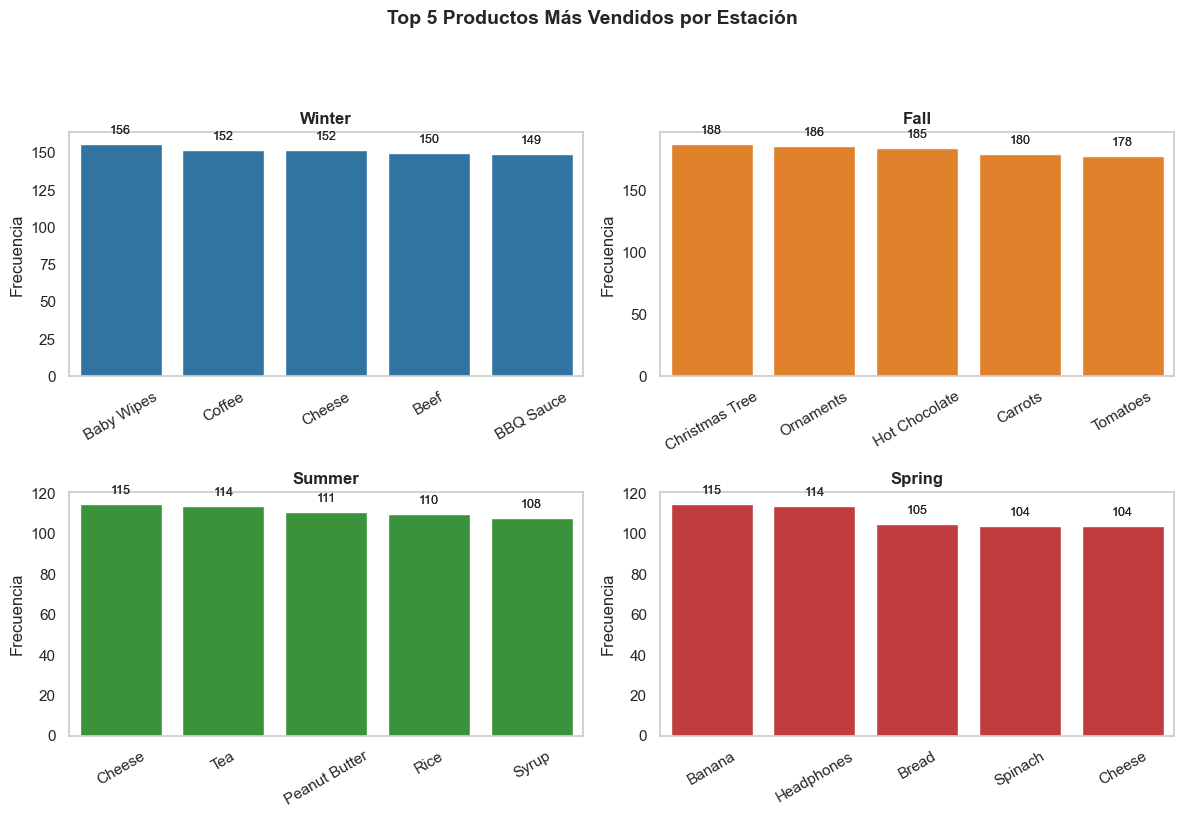

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo de gráfico
sns.set_theme(style="whitegrid")

# Colores personalizados por estación
color_winter = "#1f77b4"  # Azul
color_fall = "#ff7f0e"    # Naranja
color_summer = "#2ca02c"  # Verde
color_spring = "#d62728"  # Rojo

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Lista de estaciones
plots = [
    (winter, color_winter, 'Winter', axes[0][0]),
    (Fall, color_fall, 'Fall', axes[0][1]),
    (summer, color_summer, 'Summer', axes[1][0]),
    (spring, color_spring, 'Spring', axes[1][1]),
]

# Crear los 4 gráficos
for df, color, title, ax in plots:
    sns.barplot(x=df.products, y=df['count'], ax=ax, color=color)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('')
    ax.tick_params(axis='x', rotation=30)

    # Agregar etiquetas numéricas
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9, 
                    xytext=(0, 5), textcoords='offset points')
        

# Agregar etiquetas numéricas y quitar líneas de fondo
for ax in axes.flat:
    ax.grid(False)
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9, 
                    xytext=(0, 5), textcoords='offset points')


# Título
plt.suptitle('Top 5 Productos Más Vendidos por Estación', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Observaciones clave:

- **Otoño (Fall)** destaca por un fuerte aumento en la compra de productos navideños como **árboles de Navidad**, **adornos** y **chocolate caliente**, lo que coincide con la preparación para las celebraciones de fin de año.

- En **invierno (Winter)**, los productos más frecuentes son **artículos de cuidado personal** (como Baby Wipes), alimentos de alto consumo como **carne (Beef)**, **queso** y **café**, lo que sugiere una tendencia a abastecerse para el frío.

- En **verano (Summer)**, dominan productos de consumo cotidiano como **queso, té, mantequilla de maní** y **arroz**, que pueden asociarse a una dieta ligera y prácticas al aire libre.

- Durante la **primavera (Spring)**, aparecen productos más variados, desde frutas como **banana**, hasta artículos no alimenticios como **auriculares (Headphones)**, lo que puede estar relacionado con el aumento del tiempo al aire libre o consumo recreativo.



## Transacciones por ciudad

In [15]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Leer archivos
df_ciudades = pd.read_csv('georef.csv')

# Separar los productos en la columna
data['Product'] = data['Product'].str.strip("[]").str.replace("'", "").str.split(', ')

# Contar transacciones por ciudad
city_counts = data['City'].value_counts().reset_index()
city_counts.columns = ['Ciudad', 'Transacciones']

# Producto más comprado por ciudad
mas_comprado = data.groupby('City')['Product'].agg(lambda x: x.value_counts().index[0]).reset_index()
mas_comprado.columns = ['Ciudad', 'Producto_Mas_Comprado']

# Producto menos comprado por ciudad
menos_comprado = data.groupby('City')['Product'].agg(lambda x: x.value_counts().index[-1]).reset_index()
menos_comprado.columns = ['Ciudad', 'Producto_Menos_Comprado']

# Unir todo en un solo DataFrame
df_merged = pd.merge(city_counts, df_ciudades, left_on='Ciudad', right_on='City')
df_merged = pd.merge(df_merged, mas_comprado, on='Ciudad')
df_merged = pd.merge(df_merged, menos_comprado, on='Ciudad')

# Calcular porcentaje de transacciones
total = df_merged['Transacciones'].sum()
df_merged['Porcentaje'] = (df_merged['Transacciones'] / total) * 100

# Crear mapa
mapa = px.scatter_geo(
    df_merged,
    lat='Latitude',
    lon='Longitude',
    text='Ciudad',
    size='Transacciones',
    size_max=50,
    title='Transacciones promedio por ciudad',
    scope='usa',
    hover_name='Ciudad',
    hover_data={
        'Latitude': False,
        'Longitude': False,
        'Transacciones': True,
        'Producto_Mas_Comprado': True,
        'Producto_Menos_Comprado': True,
        'Porcentaje': True
    },
    color='Transacciones',
    color_continuous_scale='Viridis',
    labels={'Transacciones': 'Transacciones'}
)

# Leyenda del mapa
mapa.update_layout(coloraxis_colorbar=dict(
    title='Transacciones',
    thicknessmode="pixels", thickness=10,
    lenmode="pixels", len=150,
    yanchor="top", y=0.8,
    ticks="outside"
))

# Crear tabla con productos y transacciones
tabla = go.Figure(data=[go.Table(
    header=dict(values=[
        'Ciudad',
        'Transacciones',
        'Porcentaje de Transacciones',
        'Producto Más Comprado',
        'Producto Menos Comprado'
    ]),
    cells=dict(values=[
        df_merged['Ciudad'],
        df_merged['Transacciones'],
        df_merged['Porcentaje'].map("{:.2f}%".format),
        df_merged['Producto_Mas_Comprado'],
        df_merged['Producto_Menos_Comprado']
    ])
)])

tabla.update_layout(
    title='Transacciones y productos más/menos comprados por ciudad',
    margin=dict(l=0, r=0, t=30, b=0)
)

# Subplots: mapa + tabla
fig = make_subplots(
    rows=1, cols=2,
    column_widths=[0.7, 0.3],
    subplot_titles=(
        'Transacciones por ciudad',
        'Transacciones y productos más/menos comprados'
    ),
    specs=[[{'type': 'scattergeo'}, {'type': 'table'}]]
)

for trace in mapa.data:
    fig.add_trace(trace, row=1, col=1)

for trace in tabla.data:
    fig.add_trace(trace, row=1, col=2)

fig.update_layout(
    title_text='Resumen de transacciones por ciudad',
    height=600,
    showlegend=False
)

fig.show()

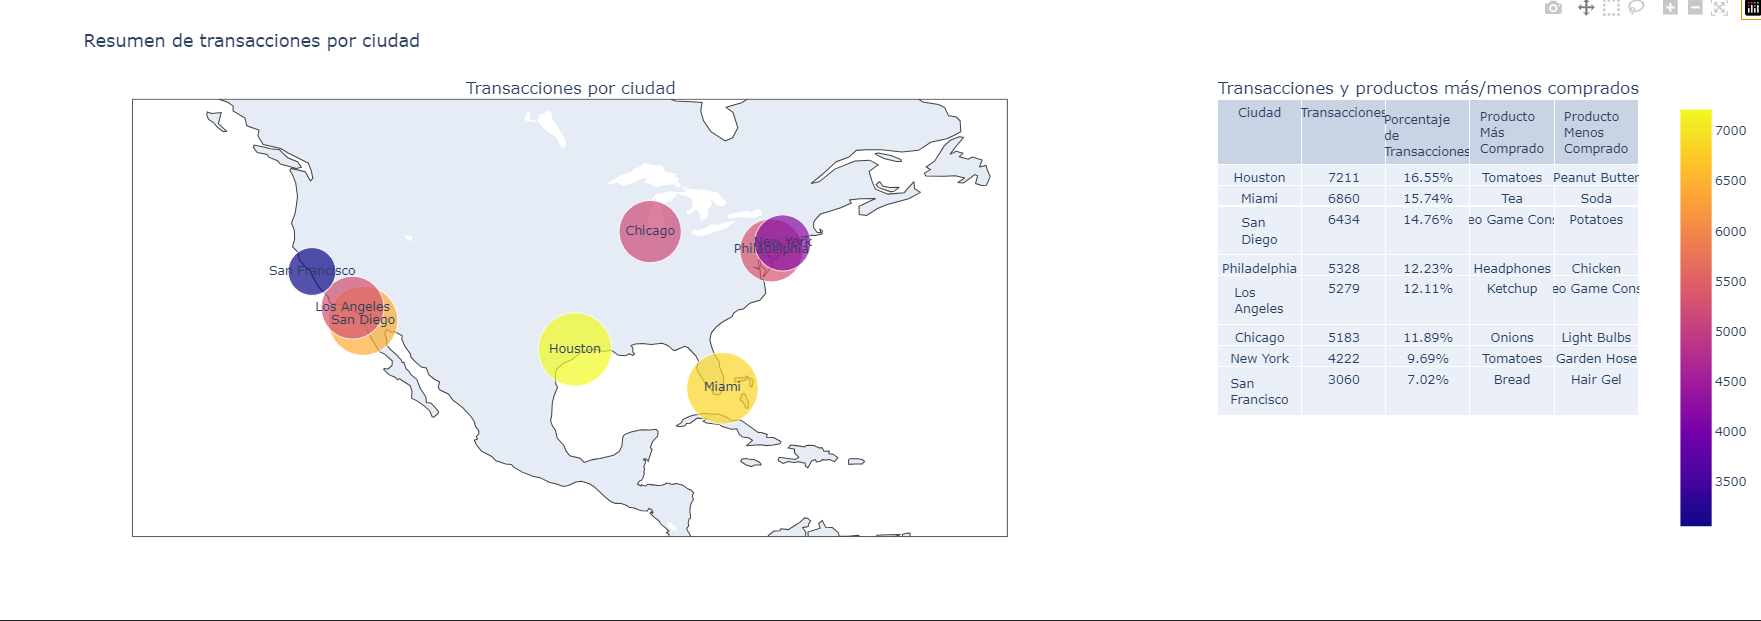

# Análisis geográfico del comportamiento de compra

- **Houston** lidera en volumen de transacciones, representando un **16.55% del total**, seguido de **Miami** y **San Diego**, lo que indica una fuerte concentración del consumo en estas tres ciudades.

- El **producto más comprado en Houston** fue **tomates**, mientras que en **Miami** fue **té**, y en **San Diego**, sorprendentemente, una **consola de videojuegos**. Esto sugiere perfiles de consumo muy distintos entre ciudades: desde necesidades básicas hasta productos de entretenimiento.

- En contraste, los **productos menos comprados** muestran un patrón curioso: en ciudades como **Chicago** o **Nueva York**, los productos menos demandados fueron artículos del hogar como **bombillas** o **mangueras de jardín**, lo que podría estar asociado al estilo de vida urbano y a la menor necesidad de productos para espacios exteriores.

- **San Francisco**, con la menor cantidad de transacciones, tiene como producto menos comprado el **gel para el cabello**, posiblemente indicando una baja rotación o una oferta poco alineada con la demanda local.

- El **mapa refuerza visualmente** estas conclusiones, mostrando cómo las ciudades con mayor actividad tienen una presencia más destacada tanto en color como en tamaño.

Este tipo de análisis permite diseñar **estrategias de marketing localizadas**, ajustando promociones según la demanda específica de cada ciudad.


# Productos más vendidos

C:\Users\paulo\AppData\Local\Temp\ipykernel_34096\1743174726.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




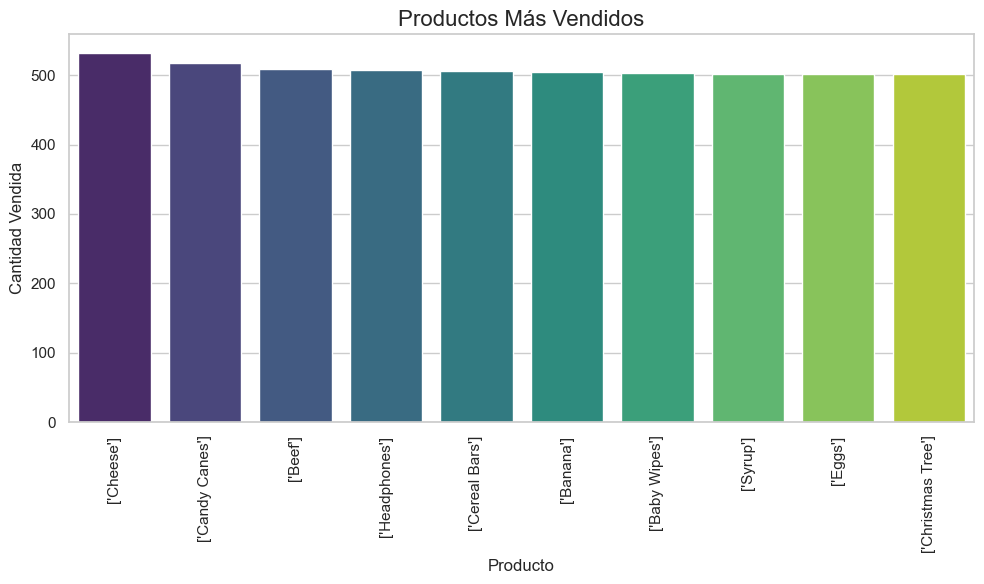

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurar que cada producto sea una cadena
data['Product'] = data['Product'].astype(str)

# Calcular la frecuencia de cada producto y convertirlo en un DataFrame
freq = data['Product'].value_counts().reset_index().head(10)
freq.columns = ['Product', 'Count']

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='Product', y='Count', data=freq, palette='viridis')

# Diseño
plt.xticks(rotation=90) 
plt.title('Productos Más Vendidos', fontsize=16)
plt.xlabel('Producto', fontsize=12)
plt.ylabel('Cantidad Vendida', fontsize=12)
plt.tight_layout()

# Mostrar el gráfico
plt.show()



# Análisis de los productos más vendidos

- El producto con mayor cantidad de ventas es **cheese (queso)**, seguido muy de cerca por **candy canes (bastones de caramelo)** y **beer (cerveza)**, lo que sugiere un alto consumo de alimentos básicos y productos estacionales.

- También se observa una fuerte presencia de productos **relacionados con celebraciones** o fines de semana, como **beer (cerveza)**, **candy canes (bastones de caramelo)**, **cereal bars (barras de cereal)** y **Christmas Tree (árbol de Navidad)**. Esto podría indicar que los clientes realizan muchas compras relacionadas con fechas festivas o reuniones.

- Algunos productos no alimenticios también se posicionan dentro del top 10, como **headphones (auriculares)** y **baby wipes (toallitas húmedas para bebés)**, lo cual podría deberse a campañas promocionales o necesidades recurrentes de los hogares.

- La venta equilibrada de alimentos (como **banana (plátano)**, **eggs (huevos)**, **syrup (jarabe)**) junto con productos tecnológicos y de higiene indica un **mix de consumo diverso** que se debe tener en cuenta para futuras estrategias comerciales y de inventario.

Este tipo de análisis ayuda a identificar productos ancla, planificar inventario y diseñar promociones cruzadas entre productos complementarios.


### K-Means: Selección del Número de Clústeres (Elbow & Silhouette)


In [34]:
#Agrupar las variables de interés
grouped_data = data.groupby('Customer_ID').agg(
    total_price=('Price', 'sum'),  # Suma total de precios por cliente
    transaction_count=('Transaction_ID', 'count'),  # Número total de transacciones por cliente
    ticket_promedio=('Price', 'mean')  # Ticket promedio por cliente
).reset_index()


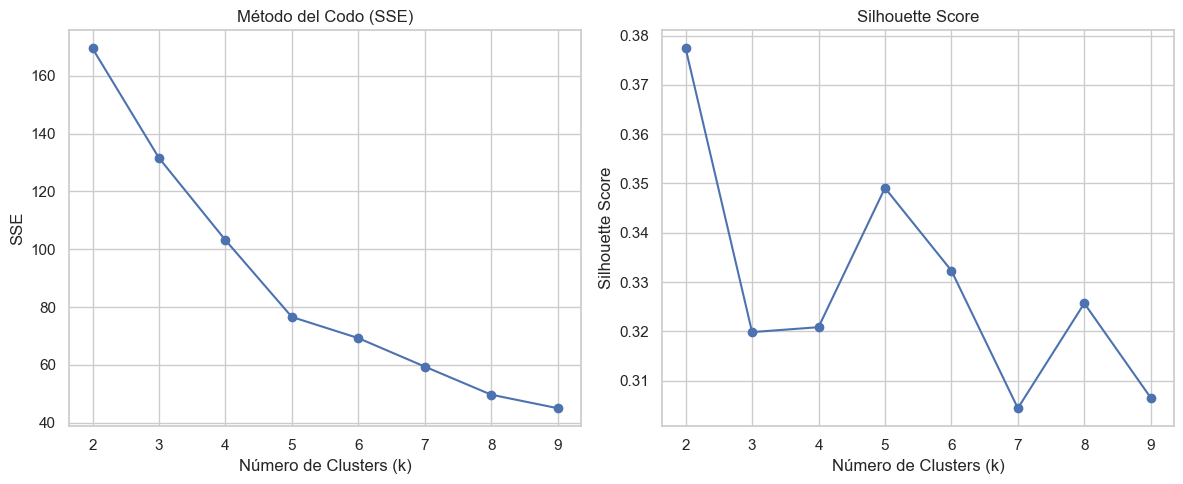

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


grouped_data['Customer_ID'] = grouped_data['Customer_ID'].astype('category')


# Seleccionar las variables para el clustering
X = grouped_data[['total_price', 'transaction_count', 'ticket_promedio']]


# Estandarizar los datos
scaler = StandardScaler()
data_escalada = scaler.fit_transform(X)

# Determinar el número óptimo de clústeres
sse = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=2025)
    kmeans.fit(data_escalada)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_escalada, kmeans.labels_))

# Graficar SSE y Silhouette Score
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Método del Codo (SSE)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()



# Conclusión: Determinación del Número Óptimo de Clusters

- En el gráfico del **Método del Codo (SSE)** se observa una disminución pronunciada de la inercia hasta **k=5**, a partir del cual la mejora marginal se reduce considerablemente. Esto indica que **k=5** es un buen punto de corte antes de que los beneficios de agregar más clústeres se vuelvan mínimos.

- El gráfico del **Silhouette Score**, que evalúa la cohesión y separación de los clusters, también muestra uno de sus valores más altos en **k=5** (~0.35), lo que refuerza la elección.

- Aunque **k=2** tiene un Silhouette Score más alto (~0.38), ese valor suele representar una segmentación demasiado general, que puede no capturar la diversidad real entre los clientes.

Por lo tanto, se concluye que **la mejor cantidad de segmentos para este caso es 5 clusters**, ya que ofrece un buen equilibrio entre compacidad (SSE) y separación (Silhouette).

Esto permitirá agrupar a los clientes en **5 segmentos diferenciados** según su comportamiento de compra.


# Aplicar K-Means con 5 clusters

In [42]:
# Seleccionar el número óptimo de clústeres
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=2025)
kmeans.fit(data_escalada)

# Asignar los clústeres al conjunto de entrenamiento y validación
grouped_data['Cluster'] = kmeans.labels_

In [43]:
import plotly.express as px

fig = px.scatter_3d(grouped_data, x='total_price', y='ticket_promedio', z='transaction_count', color='Cluster',
                    title='Visualización 3D - Clusterización de clientes',
                    width=1000,  
                    height=800)  
fig.show()


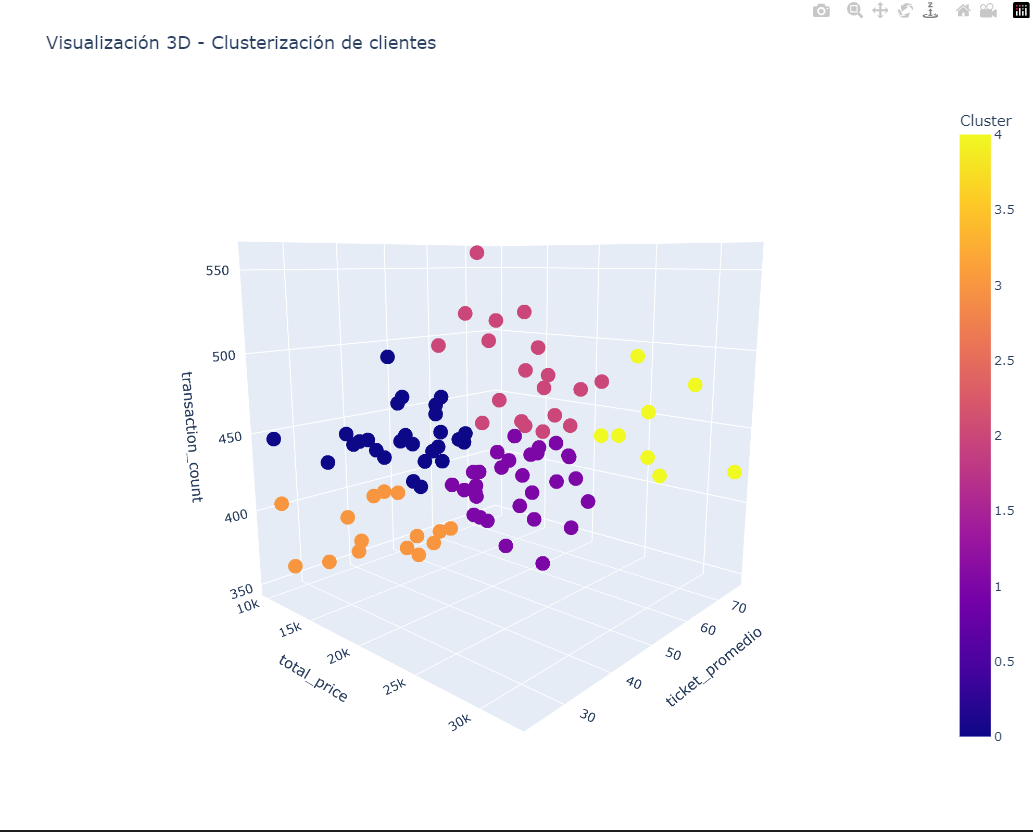

# Visualización de los segmentos de clientes

- En este gráfico tridimensional se observa la segmentación de clientes utilizando K-Means, basada en tres variables: 
  - **`total_price`** (total gastado),
  - **`transaction_count`** (número de transacciones), y
  - **`ticket_promedio`** (promedio gastado por transacción).

- Los puntos se agrupan en **5 clústeres bien definidos**, lo que refuerza que la elección de `k=5` fue adecuada. Cada color representa un segmento distinto de comportamiento.

- Se aprecia que algunos segmentos tienen **alto gasto total** pero **pocas transacciones** con **ticket promedio alto** (clientes premium), mientras que otros hacen muchas compras de **bajo valor unitario** (compradores frecuentes pero moderados).

- Esta visualización permite identificar perfiles de cliente, como:
# Segmentos de Clientes con Colores del Gráfico 3D

| Cluster | Nombre del cliente                   | Color en el gráfico | Descripción breve |
|--------:|---------------------------------------|----------------------|--------------------|
| 0       | **Cliente Leal y Frecuente** (alto `transaction_count`, ticket moderado) | 🔵 Azul oscuro       | Compra muchas veces con montos moderados. Ideal para fidelización. |
| 1       | **Cliente Premium Ocasional** (pocas compras con ticket alto) | 🟣 Morado            | Bajo volumen de compra, pero con alto valor por transacción. |
| 2       | **Cliente VIP o Premium** (alto `total_price` y `ticket_promedio`) | 🟠 Naranja           | Cliente de alto valor. Prioritario para mantener satisfecho. |
| 3       | **Cliente Promedio** (comportamiento equilibrado) | 🌸 Rosado            | Actividad estable y balanceada. Puede crecer con incentivos. |
| 4       | **Cliente Dormido o de Bajo Impacto** (bajo en todas las variables) | 🟡 Amarillo          | Bajo ticket, baja frecuencia. Requiere reactivación. |

Esta segmentación permite diseñar estrategias personalizadas para cada grupo: desde promociones específicas hasta programas de fidelización.


# Métricas de validación

- Silhouette Score

Mide la calidad de los clústeres basándose en la distancia promedio entre puntos en el mismo clúster y en el clúster más cercano.

Rango: 
− 1 a 1
(valores más cercanos a 1 indican clústeres bien separados).

In [176]:
from sklearn.metrics import silhouette_score

# Calcular el Silhouette Score en todo el conjunto de datos escalado
silhouette_avg = silhouette_score(data_escalada, kmeans.labels_)

print(f"Silhouette Score (modelo completo): {silhouette_avg:.2f}")


Silhouette Score (modelo completo): 0.35


- Calinski-Harabasz Index

Relación entre la dispersión dentro de los clústeres y entre los clústeres.

Valores más altos indican mejores clústeres.

In [177]:
from sklearn.metrics import calinski_harabasz_score

# Calcular Calinski-Harabasz Index en los datos de validación
ch_score = calinski_harabasz_score(data_escalada, kmeans.labels_)
print(f"Calinski-Harabasz Index (validación): {ch_score.round(2)}")


Calinski-Harabasz Index (validación): 69.26


# Conclusión Final del Análisis

Se realizó una segmentación de clientes utilizando el algoritmo **K-Means**, basada en tres variables clave: `total_price`, `transaction_count` y `ticket_promedio`. Luego de un análisis exploratorio y mediante la aplicación del **método del codo** y el **Silhouette Score**, se determinó que **5 clústeres** era una elección adecuada para capturar diferentes perfiles de comportamiento.

Cada clúster fue interpretado y etiquetado según sus características, permitiendo identificar perfiles como el **Cliente Premium Ocasional**, **Cliente Leal y Frecuente**, **Cliente VIP o Premium**, entre otros.

La calidad de la segmentación fue evaluada a través de métricas internas:
- **Silhouette Score:** 0.35 → indica separación razonable entre clústeres.
- **Índice de Calinski-Harabasz:** 69.26 → sugiere una estructura de clústeres válida y bien definida.

Estos resultados validan que la segmentación obtenida tiene una base sólida y puede ser utilizada como insumo para decisiones de negocio, como:
- Personalización de campañas promocionales,
- Programas de fidelización segmentados,
- Estrategias de retención y reactivación.

En conjunto, este modelo ofrece una herramienta útil para comprender el comportamiento de los clientes y generar acciones más efectivas basadas en datos.
